# Phase 1: 

In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [112]:
train_df = pd.read_json("train.json")
train_df

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,2016-04-19 04:24:47,,West 18th Street,[],medium,40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,[https://photos.renthop.com/2/6894514_9abb8592...,7995,350 West 18th Street
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,2016-04-27 03:19:56,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",low,40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,[https://photos.renthop.com/2/6930771_7e3622b6...,3600,210 West 107th Street
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,2016-04-13 06:01:42,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",low,40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6867392_b18283f6...,5645,155 West 21st Street
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,2016-04-20 02:36:35,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",medium,40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,[https://photos.renthop.com/2/6898799_3759be4c...,1725,63 Hamilton Terrace
100027,2.0,4,0,2016-04-02 02:58:15,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",low,40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,[https://photos.renthop.com/2/6814332_e19a8552...,5800,522 E 11th


In [113]:
train_df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

### Encode unicode to strings

In [63]:
train_df['description'] = train_df['description'].apply(lambda x: x.encode('utf-8').strip())

## Visualization of target variable (interest level)

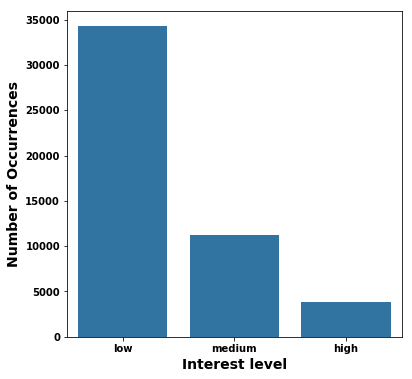

In [4]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(int_level.index, int_level.values, alpha=1, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xlabel('Interest level', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

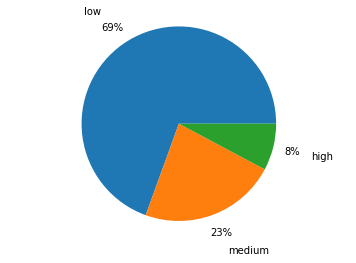

In [5]:
plt.pie(int_level.values,(0,0,0),int_level.index, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.show()

## Hour-wise listing trend

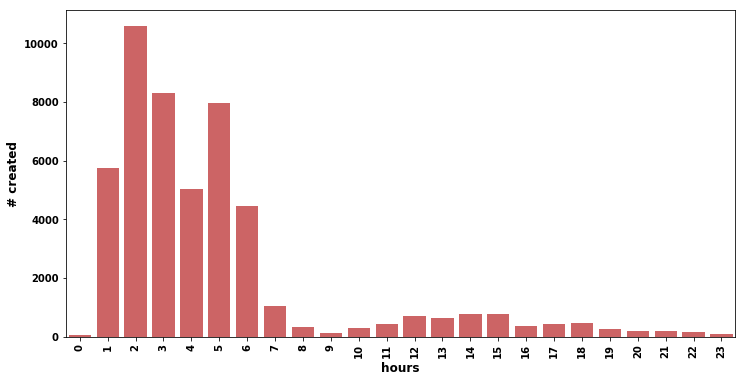

In [12]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["hour_created"] = train_df["created"].dt.hour
hour = train_df['hour_created'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(hour.index, hour.values, alpha=0.8, color=color[3])
plt.xlabel('hours', fontsize=12, fontweight='bold')
plt.ylabel('# created', fontsize=12, fontweight='bold')
plt.xticks(rotation='vertical', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [13]:
top5 = hour[:5]
print("Busiest 5:\n",top5)

('Busiest 5:\n', 2    10596
3     8318
5     7954
1     5749
4     5021
Name: hour_created, dtype: int64)


## Visualizing features

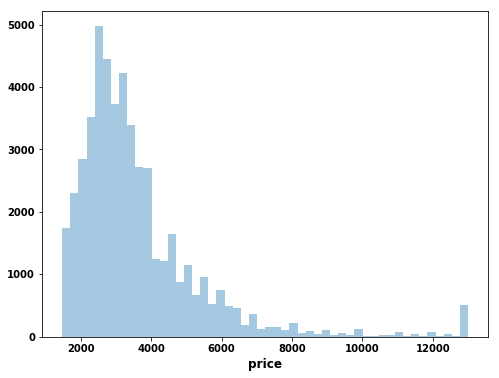

In [6]:
llimit_p = np.percentile(train_df.price.values, 1)
ulimit_p = np.percentile(train_df.price.values, 99)
train_df['price'].loc[train_df['price']<llimit_p] = llimit_p
train_df['price'].loc[train_df['price']>ulimit_p] = ulimit_p

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=False)
plt.xlabel('price', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

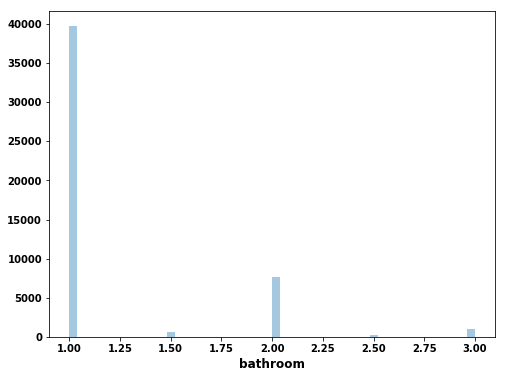

In [24]:
llimit_bath = np.percentile(train_df.bathrooms.values, 1)
ulimit_bath = np.percentile(train_df.bathrooms.values, 99)
train_df['bathrooms'].loc[train_df['bathrooms']<llimit_bath] = llimit_bath
train_df['bathrooms'].loc[train_df['bathrooms']>ulimit_bath] = ulimit_bath

plt.figure(figsize=(8,6))
sns.distplot(train_df.bathrooms.values, kde=False)
plt.xlabel('bathroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

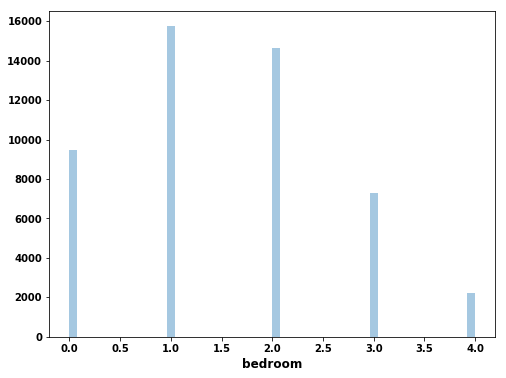

In [25]:
llimit_bed = np.percentile(train_df.bedrooms.values, 1)
ulimit_bed = np.percentile(train_df.bedrooms.values, 99)
train_df['bedrooms'].loc[train_df['bedrooms']<llimit_bed] = llimit_bed
train_df['bedrooms'].loc[train_df['bedrooms']>ulimit_bed] = ulimit_bed

plt.figure(figsize=(8,6))
sns.distplot(train_df.bedrooms.values, kde=False)
plt.xlabel('bedroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

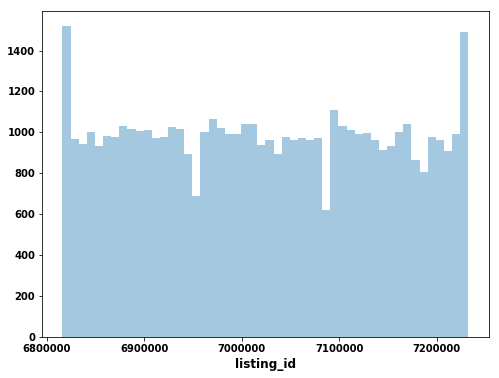

In [9]:
llimit_lid = np.percentile(train_df.listing_id.values, 1)
ulimit_lid = np.percentile(train_df.listing_id.values, 99)
train_df['listing_id'].loc[train_df['listing_id']<llimit_lid] = llimit_lid
train_df['listing_id'].loc[train_df['listing_id']>ulimit_lid] = ulimit_lid

plt.figure(figsize=(8,6))
sns.distplot(train_df.listing_id.values, bins=50, kde=False)
plt.xlabel('listing_id', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

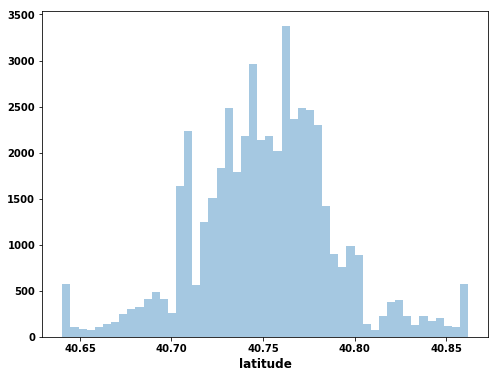

In [10]:
llimit_la = np.percentile(train_df.latitude.values, 1)
ulimit_la = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].loc[train_df['latitude']<llimit_la] = llimit_la
train_df['latitude'].loc[train_df['latitude']>ulimit_la] = ulimit_la

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

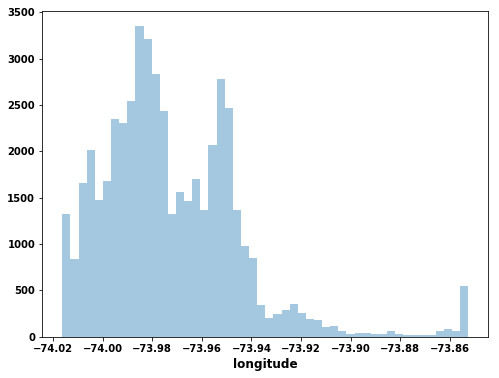

In [11]:
llimit_lo = np.percentile(train_df.longitude.values, 1)
ulimit_lo = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].loc[train_df['longitude']<llimit_lo] = llimit_lo
train_df['longitude'].loc[train_df['longitude']>ulimit_lo] = ulimit_lo

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


## Handling missing values

### Bedrooms

In [103]:
train_df.groupby('bedrooms').count()

,bathrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
bedrooms,,,,,,,,,,,,,,
0.0,9475,9475,9475,8813,9475,9475,9475,9475,9475,9475,9475,9475,9475,9475
1.0,15752,15752,15752,14470,15752,15752,15752,15752,15752,15752,15752,15752,15752,15752
2.0,14623,14623,14623,13688,14623,14623,14623,14623,14623,14623,14623,14623,14623,14623
3.0,7276,7276,7276,6920,7276,7276,7276,7276,7276,7276,7276,7276,7276,7276
4.0,2226,2226,2226,2125,2226,2226,2226,2226,2226,2226,2226,2226,2226,2226


In [101]:
train_df.groupby('bedrooms').count().sum()

bathrooms          49352
building_id        49352
created            49352
description        46016
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
dtype: int64

We found 9475 values with a bedroom count of 0. This is simply too high of a number to assume it is an error. Upon checking some photos, we realized that these are probably studio apartments so no bedrooms makes sense. When we aggregated the count of every value of bedrooms, we found there were no missing values.

### Bathrooms

In [105]:
train_df.groupby('bathrooms').count()

,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
bathrooms,,,,,,,,,,,,,,
1.0,39735,39735,39735,36979,39735,39735,39735,39735,39735,39735,39735,39735,39735,39735
1.5,645,645,645,609,645,645,645,645,645,645,645,645,645,645
2.0,7660,7660,7660,7170,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660
2.5,277,277,277,272,277,277,277,277,277,277,277,277,277,277
3.0,1035,1035,1035,986,1035,1035,1035,1035,1035,1035,1035,1035,1035,1035


In [106]:
train_df.groupby('bathrooms').count().sum()

bedrooms           49352
building_id        49352
created            49352
description        46016
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
dtype: int64

Again, we found no missing values for bathrooms.

### Building ID

In [68]:
#building_id

whichrow = 0
count = 0
for row in train_df['building_id']:
    if row=='0':
        count+=1
        #train_df.loc[train_df.index[whichrow], 'building_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(30)

('number of missing values: ', 8286)


It's unlikely that building ID has any effect on the interest level of a listing so we left these values.

### Description

In [114]:
#description

whichrow = 0
count = 0
for row in train_df['description']:
    if  any(c.isalpha() for c in row) == False:
        count+=1
        train_df.loc[train_df.index[whichrow], 'description'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3336)


### Features

In [69]:
#features

whichrow = 0
count = 0
for row in train_df['features']:
    if row==[]:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'features'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3218)


In [ ]:
#print (train_df.isnull().values.any())

In [ ]:
#print (train_df.isnull().sum().sum())

In [115]:
#created

whichrow = 0
count = 0
for row in train_df['created']:
    if re.match('\d{2}:\d{2}:\d{2}', row) :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'created'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [110]:
#display_address

whichrow = 0
count = 0
for row in train_df['display_address']:
    if any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'display_address'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 141)


In [72]:
#street_address

whichrow = 0
count = 0
for row in train_df['street_address']:
    if any(c.isalpha() for c in row) == False :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'street_address'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 13)


In [73]:
#latitude

whichrow = 0
count = 0
for row in train_df['latitude']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'latitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 12)


In [74]:
#listing_id

whichrow = 0
count = 0
for row in train_df['listing_id']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'listing_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [75]:
#longitude

whichrow = 0
count = 0
for row in train_df['longitude']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'longitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 12)


In [76]:
#manager_id

whichrow = 0
count = 0
for row in train_df['manager_id']:
    if  any(c.isalpha() for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'manager_id'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [77]:
#photos

whichrow = 0
count = 0
for row in train_df['photos']:
    if  any(isinstance(c,str) for c in row) == False:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'photos'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 49352)


In [78]:
#price

whichrow = 0
count = 0
for row in train_df['price']:
    if row==0:
        count+=1
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [79]:
#interest_level

whichrow = 0
count = 0
list= ["low", "medium", "high"]
for row in train_df['interest_level']:
    if row not in list :
        count+=1
        #train_df.loc[train_df.index[whichrow], 'interest_level'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [ ]:
#print(ulimit_p)

In [ ]:
#print( train_df['photos'])

In [ ]:
#pd.options.display.max_colwidth = 10

## Handling outliers

In [ ]:

whichrow = 0
count =0
for row in train_df['price']:
    if row<llimit_p/2 or row>ulimit_p*2:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

        

In [ ]:
whichrow = 0
count =0
for row in train_df['latitude']:
    if row<llimit_la or row>ulimit_la:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)


In [ ]:
whichrow = 0
count =0
for row in train_df['longitude']:
    if row<llimit_lo or row>ulimit_lo:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)


In [ ]:
whichrow = 0
count =0
for row in train_df['bathrooms']:
    if row>ulimit_bath:
    #if row<llimit_bath or row>ulimit_bath:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

In [ ]:
whichrow = 0
count =0
for row in train_df['bedrooms']:
    if row<llimit_bed or row>ulimit_bed:
        #train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
        count+=1
    else:
        whichrow+=1
        
print ("number of outliers: ", count)

In [ ]:
max(train_df.bathrooms)

In [ ]:
min(train_df.bathrooms)

In [80]:
ulimit_bath

3.0

In [81]:
llimit_bath

1.0

In [ ]:
max(train_df.bedrooms)

In [ ]:
min(train_df.bedrooms)

In [ ]:
ulimit_bed

In [ ]:
llimit_bed

In [ ]:
max(train_df.longitude)


In [ ]:
min(train_df.longitude)

In [ ]:
max(train_df.latitude)


In [ ]:
min(train_df.latitude)

In [ ]:
ulimit_lo

In [ ]:
llimit_lo

In [ ]:
ulimit_la

In [ ]:
llimit_la

In [ ]:
ulimit_p

In [ ]:
llimit_p

In [ ]:
max(train_df.price)

In [ ]:
min(train_df.price)

In [ ]:
max(train_df.listing_id)

In [ ]:
min(train_df.listing_id)

In [ ]:
ulimit_lid

In [ ]:
llimit_lid

In [ ]:
train_df.head(10)

## Text feature extraction

In [ ]:
type(train_df.description[4])

In [93]:
train_df.description[4]

'Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a  website_redacted'

In [92]:

words = re.findall(r'[a-zA-Z]+', train_df.description[4])
words

['Spacious',
 'Bedroom',
 'Bathroom',
 'in',
 'Williamsburg',
 'Apartment',
 'Features',
 'Renovated',
 'Eat',
 'in',
 'Kitchen',
 'With',
 'Dishwasher',
 'Renovated',
 'Bathroom',
 'Beautiful',
 'Hardwood',
 'Floors',
 'Lots',
 'of',
 'Sunlight',
 'Great',
 'Closet',
 'Space',
 'Freshly',
 'Painted',
 'Heat',
 'and',
 'Hot',
 'Water',
 'Included',
 'Live',
 'in',
 'Super',
 'Nearby',
 'L',
 'J',
 'M',
 'G',
 'Trains',
 'br',
 'br',
 'Contact',
 'Information',
 'Kenneth',
 'BeakExclusive',
 'AgentC',
 'Email',
 'kagglemanager',
 'renthop',
 'com',
 'Text',
 'or',
 'Email',
 'to',
 'schedule',
 'a',
 'private',
 'viewing',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'br',
 'p',
 'a',
 'website',
 'redacted']

In [49]:
whichrow = 0
for rows in train_df['description']:
    words += re.split(r'\W+', train_df.description[train_df.index[whichrow]])
    whichrow+=1
words

[u'Spacious',
 u'1',
 u'Bedroom',
 u'1',
 u'Bathroom',
 u'in',
 u'Williamsburg',
 u'Apartment',
 u'Features',
 u'Renovated',
 u'Eat',
 u'in',
 u'Kitchen',
 u'With',
 u'Dishwasher',
 u'Renovated',
 u'Bathroom',
 u'Beautiful',
 u'Hardwood',
 u'Floors',
 u'Lots',
 u'of',
 u'Sunlight',
 u'Great',
 u'Closet',
 u'Space',
 u'Freshly',
 u'Painted',
 u'Heat',
 u'and',
 u'Hot',
 u'Water',
 u'Included',
 u'Live',
 u'in',
 u'Super',
 u'Nearby',
 u'L',
 u'J',
 u'M',
 u'G',
 u'Trains',
 u'br',
 u'br',
 u'Contact',
 u'Information',
 u'Kenneth',
 u'BeakExclusive',
 u'AgentC',
 u'064',
 u'692',
 u'8838Email',
 u'kagglemanager',
 u'renthop',
 u'com',
 u'Text',
 u'or',
 u'Email',
 u'to',
 u'schedule',
 u'a',
 u'private',
 u'viewing',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'br',
 u'p',
 u'a',
 u'website_redacted',
 u'',
 u'A',
 u'Brand',
 u'New',
 u'3',
 u'Bedroom',
 u'1',
 u'5',
 u'bath',
 u'ApartmentEnjoy',
 u'These',
 u'

## Image feature extraction